# Unemployment Data

Source: https://oui.doleta.gov/unemploy/claims.asp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop unnecessary columns
unemp = pd.read_csv('materials/unemployment.csv').drop(columns=['State', 'Reflecting Week Ended', 'Unnamed: 7', 
                                                                'Unnamed: 8', 'Unnamed: 9']).dropna()
# Rename columns
unemp.columns = ['week_filed', 'initial_claims', 'continued_claims', 'covered_employment', 'unemployment_rate']

# Turn 'week_filed' into datetime object, set as index, drop original 'week_filed' column
unemp.index = pd.to_datetime(unemp['week_filed'])
unemp.drop('week_filed', axis=1, inplace=True)

> #### Data Dictionary:
>
> `initial_claims`:     individuals filing for unemployment for the first time
>
> `continued_claims`:   individuals who have filed for two or more consecutive weeks
>
> `covered_employment`: individuals whose employer pays unemployment insurance
>
> `unemployment_rate`:  continued claims as a percentage of entire labor force

In [3]:
unemp.head()

,initial_claims,continued_claims,covered_employment,unemployment_rate
week_filed,,,,
2000-01-08,"18,872","123,890","8,738,970",1.42
2000-01-15,"15,218","124,372","8,738,970",1.42
2000-01-22,"14,151","119,713","8,738,970",1.37
2000-01-29,"12,024","121,715","8,738,970",1.39
2000-02-05,"13,771","115,755","8,738,970",1.32


In [4]:
for col in unemp[['initial_claims', 'continued_claims', 'covered_employment']]:
    unemp[col] = unemp[col].apply(lambda x: str(x).replace(',', ''))
    unemp[col] = unemp[col].apply(lambda x: int(x) if x.isdigit() else x)

In [5]:
unemp.dtypes

initial_claims          int64
continued_claims        int64
covered_employment      int64
unemployment_rate     float64
dtype: object

### What's the overall pattern?

In [6]:
unemp['initial_claims'].sort_values(ascending=False).head(10)

week_filed
2017-09-02    63788
2017-09-09    52024
2008-09-27    49398
2008-09-20    35860
2010-01-09    32475
2009-03-14    31597
2008-10-04    31480
2009-01-17    31367
2005-10-08    30949
2013-01-12    30932
Name: initial_claims, dtype: int64

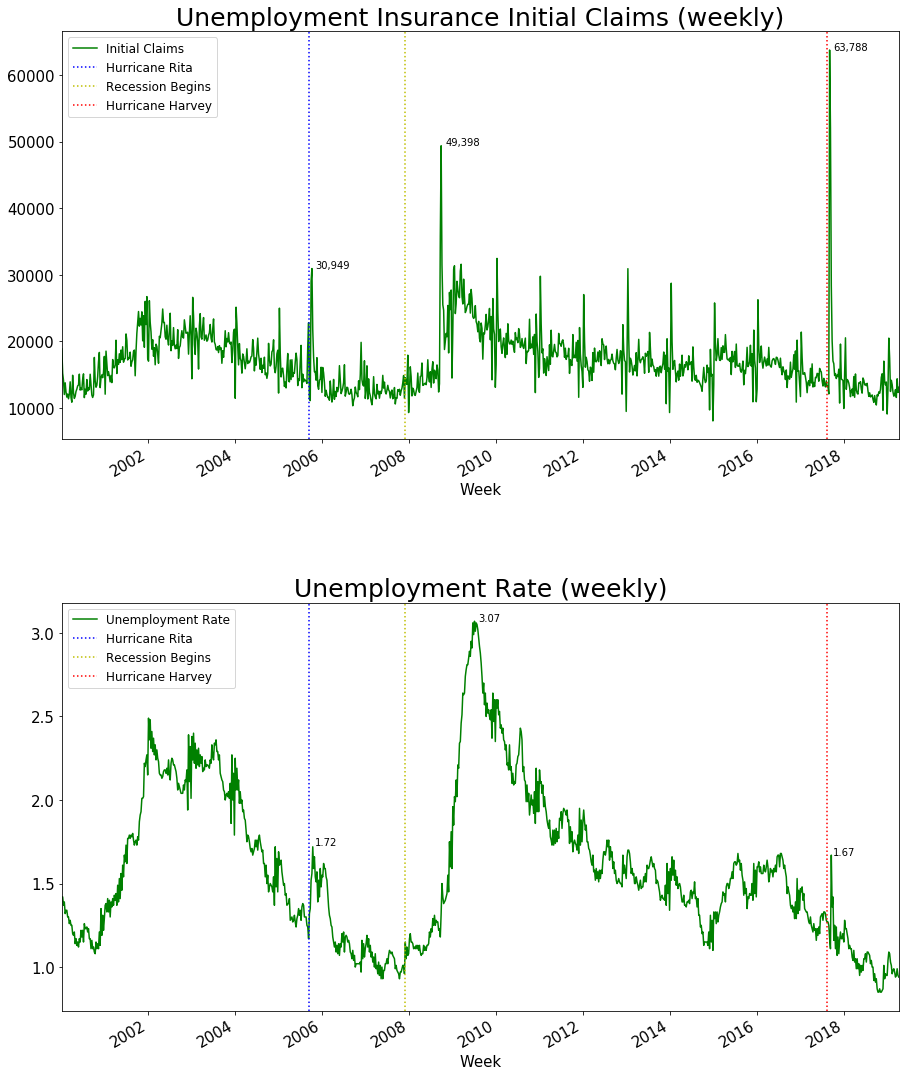

In [966]:
fig, axes = plt.subplots(2, figsize=(15, 20))

# Initial claims
unemp['initial_claims'].plot(c='g', fontsize=15, label='Initial Claims', ax=axes[0])
axes[0].axvline(x='2005-09-17', color='b', linestyle=':').set_label('Hurricane Rita')
axes[0].text(x='2005-11', y=30951, s='30,949')

axes[0].axvline(x='2007-12', color='y', linestyle=':').set_label('Recession Begins')
axes[0].text(x='2008-11', y=49400, s='49,398')

axes[0].axvline(x='2017-08-13', color='r', linestyle=':').set_label('Hurricane Harvey')
axes[0].text(x='2017-10', y=63800, s='63,788')

axes[0].set_xlabel('Week', fontsize=15)
axes[0].legend(fontsize='large')
axes[0].set_title('Unemployment Insurance Initial Claims (weekly)', fontsize=25);

# Unemployment rate
unemp['unemployment_rate'].plot(c='g', fontsize=15, label='Unemployment Rate', ax=axes[1])
axes[1].axvline(x='2005-09-17', color='b', linestyle=':').set_label('Hurricane Rita')
axes[1].text(x='2005-11', y=1.73, s='1.72')

axes[1].axvline(x='2007-12', color='y', linestyle=':').set_label('Recession Begins')
axes[1].text(x='2009-08', y=3.07, s='3.07')

axes[1].axvline(x='2017-08-13', color='r', linestyle=':').set_label('Hurricane Harvey')
axes[1].text(x='2017-10', y=1.67, s='1.67')

axes[1].set_xlabel('Week', fontsize=15)
axes[1].legend(fontsize='large')
axes[1].set_title('Unemployment Rate (weekly)', fontsize=25)

plt.subplots_adjust(hspace=.4);

### Narrow down to Rita (2005-09-18 to 2005-09-26)

In [8]:
rita_unemp = unemp['2005-8'].append(unemp['2005-09']).append(unemp['2005-10'])
rita_unemp

,initial_claims,continued_claims,covered_employment,unemployment_rate
week_filed,,,,
2005-08-06,14334,118660,9095850,1.30
2005-08-13,14140,118683,9095850,1.30
2005-08-20,14055,118338,9095850,1.30
2005-08-27,13687,113708,9095850,1.25
2005-09-03,19300,112996,9095850,1.24
2005-09-10,22806,106312,9095850,1.17
2005-09-17,11364,120207,9095850,1.32
2005-09-24,11110,123005,9095850,1.35
2005-10-01,29041,138357,9095850,1.52


### Narrow down to Harvey (2017-08-17 to 2017-09-02)

In [9]:
harvey_unemp = unemp['2017-08'].append(unemp['2017-09']).append(unemp['2017-10'])
harvey_unemp

,initial_claims,continued_claims,covered_employment,unemployment_rate
week_filed,,,,
2017-08-05,14081,147742,11545879,1.28
2017-08-12,13218,146399,11545879,1.27
2017-08-19,13290,146555,11545879,1.27
2017-08-26,12105,143964,11545879,1.25
2017-09-02,63788,135605,11545879,1.17
2017-09-09,52024,128496,11545879,1.11
2017-09-16,28387,193355,11545879,1.67
2017-09-23,20104,156703,11545879,1.36
2017-09-30,17063,163562,11545879,1.42


# Quarterly Census of Employment and Wages - State

Source: https://texaslmi.com/LMIbyCategory/QCEW

In [716]:
wages = pd.read_csv('materials/qcew.csv')

# Make index a datetime object of year and quarter; dropping original 'Year' column
wages.index = pd.to_datetime(wages['Year'].astype(str) + '-Q' + wages['Period'].astype(str))

# Rename columns
wages.columns = ['year', 'period', 'estabs', 'firms', 'avg_emp', 'avg_wage', 
                 'total_wages', 'month_1', 'month_2', 'month_3']

> #### Data Dictionary:
>
> `year`:   year of recording
>
> `period`:     business quarter
>
> `estabs`:   number of establishments (individual facilities) in the state
>
> `firms`: number of firms (companies) in the state
>
> `avg_emp`:  average number of employed persons
>
> `avg_wage`:     average weekly wage
>
> `total_wages`:   total of all wages paid in the state
>
> `month_1`: number of employed persons during month 1 of the quarter
>
> `month_2`:  number of employed persons during month 2 of the quarter 
>
> `month_3`: number of employed persons during month 3 of the quarter


In [717]:
wages.head()

,year,period,estabs,firms,avg_emp,avg_wage,total_wages,month_1,month_2,month_3
2000-01-01,2000,1,"487,233","392,484","9,117,427",675,"80,037,886,713","9,040,775","9,115,889","9,195,616"
2000-04-01,2000,2,"486,354","391,431","9,282,615",645,"77,831,416,979","9,217,134","9,293,521","9,337,191"
2000-07-01,2000,3,"489,932","393,759","9,311,295",657,"79,548,958,475","9,251,169","9,311,673","9,371,042"
2000-10-01,2000,4,"490,410","394,072","9,416,084",710,"86,936,767,365","9,371,449","9,411,643","9,465,161"
2001-01-01,2001,1,"490,867","393,512","9,317,098",711,"86,154,158,484","9,250,933","9,320,114","9,380,248"


In [718]:
for col in wages:
    wages[col] = wages[col].apply(lambda x: str(x).replace(',', ''))
    wages[col] = wages[col].apply(lambda x: int(x) if x.isdigit() else x)

In [719]:
wages.dtypes

year           int64
period         int64
estabs         int64
firms          int64
avg_emp        int64
avg_wage       int64
total_wages    int64
month_1        int64
month_2        int64
month_3        int64
dtype: object

In [720]:
m = wages[['month_1', 'month_2', 'month_3']].T
a = []
for col in m.columns:
    for each in m[col]:
        a.append(each)

monthly = pd.DataFrame(a)

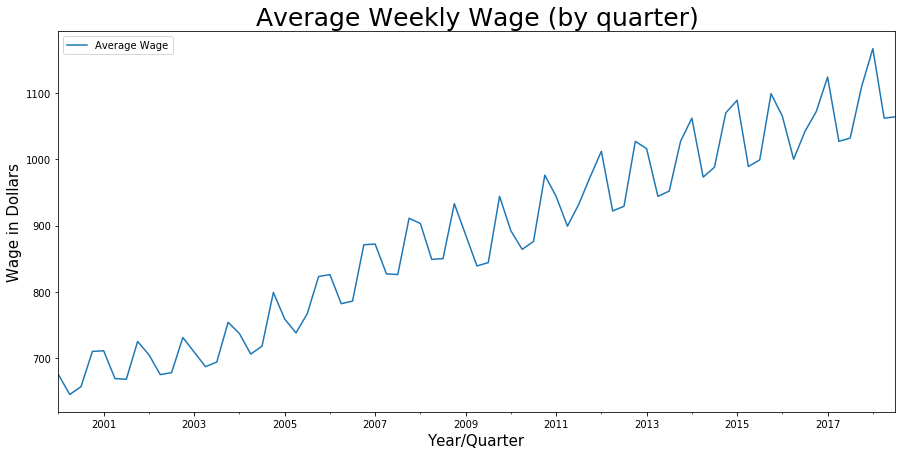

In [721]:
ax = wages['avg_wage'].plot(figsize=(15,7))
ax.set_xlabel('Year/Quarter', fontsize=15)
ax.set_ylabel('Wage in Dollars', fontsize=15)
ax.set_title('Average Weekly Wage (by quarter)', fontsize=25)
ax.legend(labels=['Average Wage']);

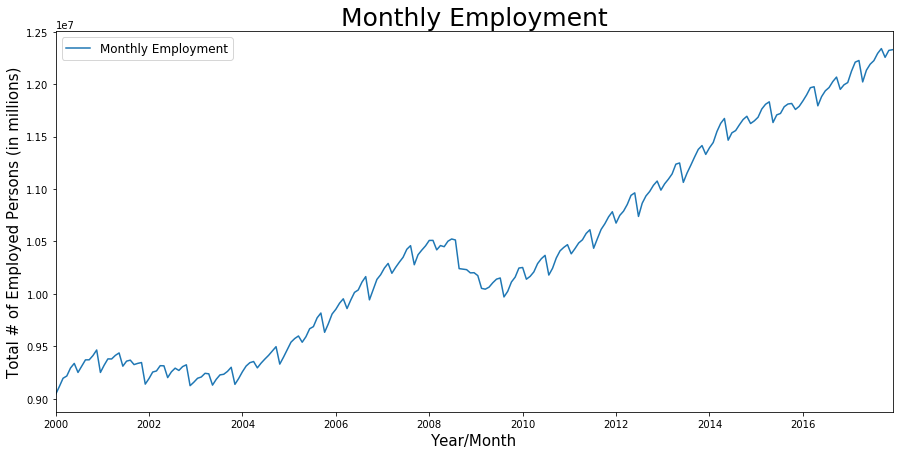

In [288]:
ax = monthly.plot(figsize=(15,7), label='Monthly Employment')
ax.set_xticklabels(['2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018'])
ax.set_xlabel('Year/Month', fontsize=15)
ax.set_ylabel('Total # of Employed Persons (in millions)', fontsize=15)
ax.set_title('Monthly Employment', fontsize=25)

ax.legend(labels=['Monthly Employment'], fontsize=12);

Somewhat interestingly, the average wage is very highly correlated with the number of companies in the state.

In [312]:
wages.corr()[['avg_wage']].sort_values(by='avg_wage', ascending=False)[1:]

,avg_wage
total_wages,0.987663
estabs,0.952854
firms,0.944586
month_3,0.942355
avg_emp,0.939948
month_2,0.939740
month_1,0.937178
period,0.044662


# Quarterly Census of Employment and Wages - County

Source: https://texaslmi.com/LMIbyCategory/QCEW

In [723]:
wages_county = pd.read_csv('materials/qcew_county.csv')

In [724]:
# Make index a datetime object of year and quarter; dropping original 'Year' column
wages_county.index = pd.to_datetime(wages_county['Year'].astype(str) + '-Q' + wages_county['Period'].astype(str))

# Rename columns
wages_county.columns = ['year', 'period', 'county', 'estabs', 'firms', 'avg_emp', 'avg_wage', 
                        'total_wages', 'month_1', 'month_2', 'month_3']

# Lowercase counties
wages_county['county'] = wages_county['county'].apply(lambda x: x.lower())

In [725]:
wages_county.head()

,year,period,county,estabs,firms,avg_emp,avg_wage,total_wages,month_1,month_2,month_3
2000-01-01,2000,1,loving,13,13,57,797,"593,963",57,58,57
2000-01-01,2000,1,king,21,20,147,534,"1,021,852",140,150,152
2000-01-01,2000,1,kenedy,24,23,272,374,"1,321,583",273,275,267
2000-01-01,2000,1,borden,38,31,130,460,"779,350",129,127,135
2000-01-01,2000,1,kent,37,35,283,367,"1,350,110",288,279,282


In [726]:
for col in wages_county:
    wages_county[col] = wages_county[col].apply(lambda x: str(x).replace(',', ''))
    wages_county[col] = wages_county[col].apply(lambda x: int(x) if x.isdigit() else x)

In [727]:
wages_county.dtypes

year            int64
period          int64
county         object
estabs          int64
firms           int64
avg_emp         int64
avg_wage        int64
total_wages     int64
month_1         int64
month_2         int64
month_3         int64
dtype: object

# Harvey  & Rita Data

In [728]:
harvey = pd.read_csv('./materials/harvey_data.csv').drop(harvey.iloc[:, 18:34], axis=1)
rita = pd.read_csv('./materials/rita_data.csv').drop(rita.iloc[:, 18:34], axis=1)

# Wage data 
wages_harvey_cty = [each for each in list(set(wages_county['county'].values)) if each in harvey['county'].values]
wages_rita_cty = [each for each in list(set(wages_county['county'].values)) if each in rita['county'].values]
wages_harvey = wages_county.loc[wages_county['county'].isin(wages_harvey_cty)]
wages_rita = wages_county.loc[wages_county['county'].isin(wages_rita_cty)]

# Time Series

In [826]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Hurricane Harvey - Quarterly Wages & Employment

In [783]:
# Top three counties with the most damage assessed by FEMA
sorted(list(harvey.sort_values(by='total_damage', ascending=False)['county'].head(3).values))

['harris', 'jefferson', 'orange']

In [782]:
harris = wages_harvey[wages_harvey['county'] == 'harris']
jefferson = wages_harvey[wages_harvey['county'] == 'harris']
orange = wages_harvey[wages_harvey['county'] == 'harris']

### Harris County - Wages

In [804]:
# Not including 2017 or quarters post-Harvey
harris_harvey = harris.iloc[:70]

In [805]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(harris_harvey['avg_wage']))

Test Statistic   -1.080544
p-value           0.722768
dtype: float64

The wage data are not stationary. We'll need to difference the data.

In [806]:
# Iterate through all possible differences.
for d in range(1, len(harris_harvey['avg_wage'])):
    if interpret_dftest(adfuller(harris_harvey['avg_wage'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=6 yields a stationary time series


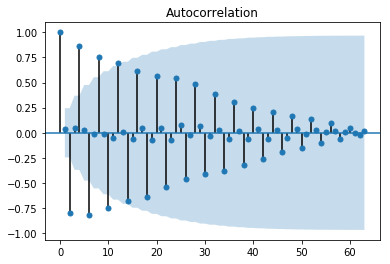

In [843]:
plot_acf(harris_harvey['avg_wage'].diff(6).dropna());

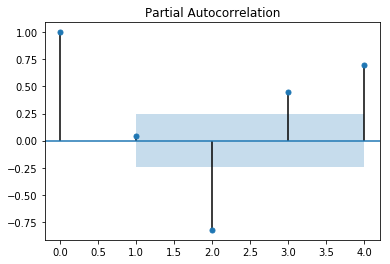

In [894]:
plot_pacf(harris_harvey['avg_wage'].diff(6).dropna(), lags=4);

In [ ]:
.diff(6)

In [930]:
model = ARIMA(endog = harris_harvey['avg_wage'].dropna(), order=(1,0,1))
arima = model.fit()
preds = arima.predict()

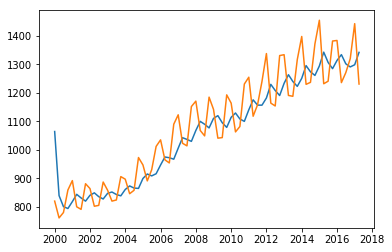

In [932]:
plt.plot(preds);
plt.plot(harris_harvey['avg_wage']);

## Hurricane Harvey - Weekly Unemployment (Statewide)

In [944]:
unemp[:887]
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(unemp['initial_claims'][:887]))

Test Statistic   -2.760245
p-value           0.064181
dtype: float64

In [946]:
# Iterate through all possible differences.
for d in range(1, len(unemp['initial_claims'])):
    if interpret_dftest(adfuller(unemp['initial_claims'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=1 yields a stationary time series


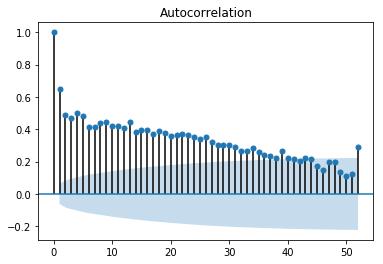

In [949]:
plot_acf(unemp['initial_claims'], lags=52);

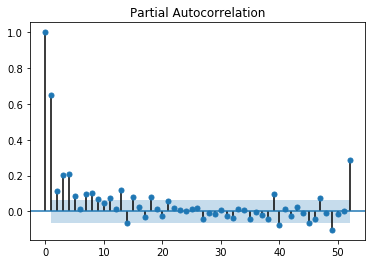

In [951]:
plot_pacf(unemp['initial_claims'], lags=52);

In [1014]:
unemp.head()

,initial_claims,continued_claims,covered_employment,unemployment_rate
week_filed,,,,
2000-01-08,18872,123890,8738970,1.42
2000-01-15,15218,124372,8738970,1.42
2000-01-22,14151,119713,8738970,1.37
2000-01-29,12024,121715,8738970,1.39
2000-02-05,13771,115755,8738970,1.32


#### ARIMA Model - Texas Unemployment

C:\Users\gcamp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
C:\Users\gcamp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\gcamp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


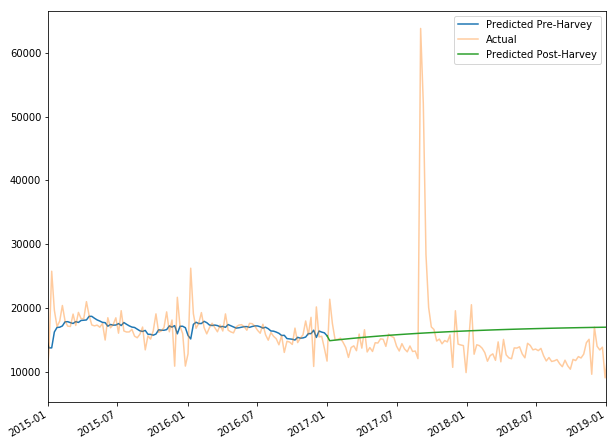

In [1035]:
model = ARIMA(unemp['initial_claims'][:887],
              dates=unemp.index[:887],
              order=(1,0,1))
arima = model.fit()
preds = arima.predict()

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(preds, label='Predicted Pre-Harvey')
plt.plot(unemp['initial_claims'], alpha = .4, label='Actual')
pd.Series(arima.predict(start=unemp.index[886],
             end=unemp.index[-1])).plot(label='Predicted Post-Harvey')
plt.xlim('2015', '2019')
plt.legend();

## Hurricane Rita - Quarterly Wages

In [785]:
# Top three counties with the most damage assessed by FEMA
sorted(list(rita.sort_values(by='total_damage', ascending=False)['county'].head(3).values))

['hardin', 'jefferson', 'orange']

## Hurricane Rita - Weekly Unemployment (Statewide)

# Maybe:

## Hurricane Harvey - Income/Population (??)

In [786]:
# FEMA / Other money data
harvey_fema = harvey.iloc[:, :18]
harvey_money = harvey.iloc[:, 18:].join(harvey['county'])

In [731]:
# Making these counties into a dataframe of relevant information
def county_wise(original_df, county_name):
    new_df = pd.DataFrame(index=range(2003,2018), columns=['per_cap_income', 'personal_income', 'population'])
    new_df.index = pd.to_datetime(new_df.index, format='%Y')
    new_df['per_cap_income'] = original_df[original_df['county'] == county_name].T.iloc[:15].values
    new_df['population'] = original_df[original_df['county'] == county_name].T.iloc[15:30].values
    new_df['personal_income'] = original_df[original_df['county'] == county_name].T.iloc[30:45].values
    return new_df

In [732]:
harris = county_wise(harvey_money, 'harris')
jefferson = county_wise(harvey_money, 'jefferson')
orange = county_wise(harvey_money, 'orange')